In [8]:
# sample

#Imports
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load dataset
df = pd.read_csv('train.csv', delimiter=',')

In [11]:
#Statistics Summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

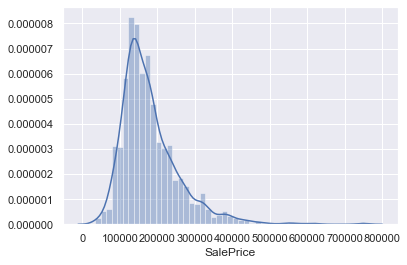

In [12]:
#Histogram
sns.distplot(df['SalePrice'])

In [13]:
#Linear Relationship Ratios
corr_matrix = df.corr()
print(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We learned from this that top ten best values to use to predict the SalePrice are OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd.

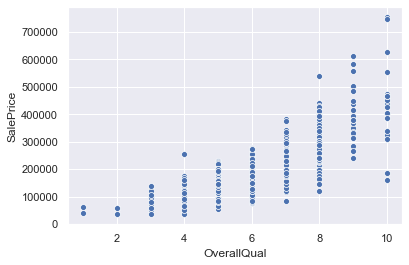

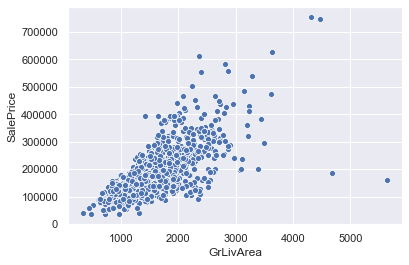

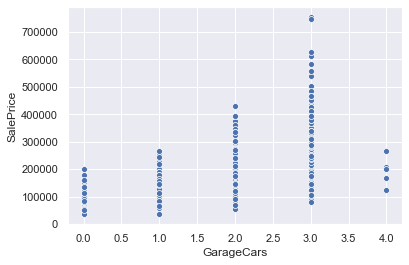

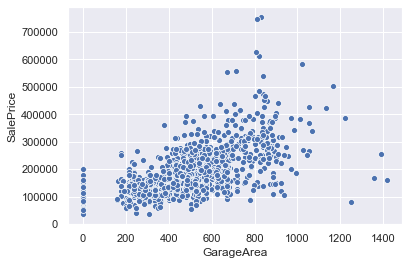

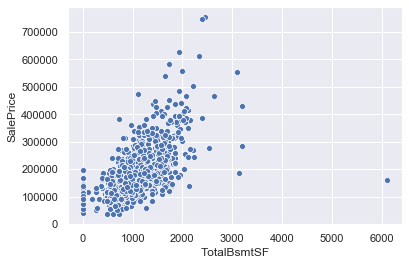

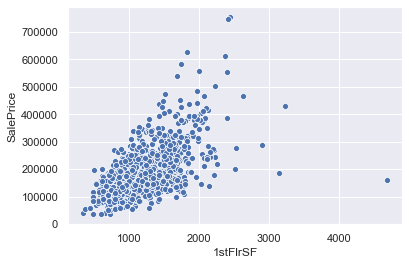

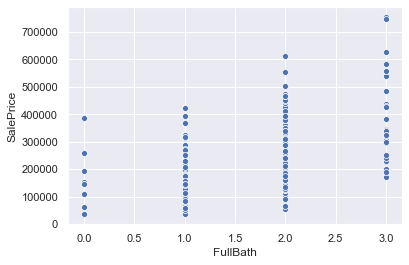

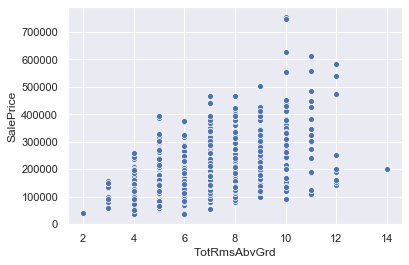

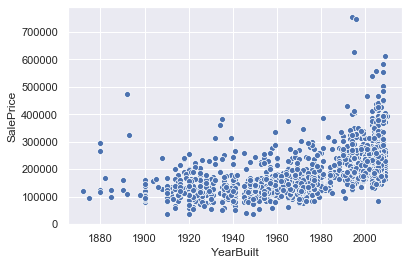

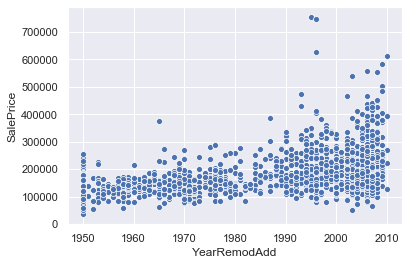

In [14]:
#Scatterplots
sns.set()
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
for column in columns:
    plt.figure()
    sns.scatterplot(df[column], df['SalePrice'])

In [15]:
#Missing data

# Calculates the percentage of data missing for all features
total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [16]:
# Reload dataset in case data was changed
df = pd.read_csv('train.csv', delimiter=',')

# Excluding non-numerical data
#df = df.select_dtypes(exclude=['object'])

In [17]:
# Using the most relevant data and filling in the NaN's with the column mean values
columns = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
df = df[columns]
df = df.fillna(df.mean())
dataset = df.values

In [18]:
# SalePrice goes into Y and the other values into X
X = dataset[:,:10]
Y = dataset[:,10]

In [19]:
#Create Model
model = Sequential([ #Create the single input layer
    Dense(32, activation = 'relu', input_shape = (10,)), # Creating only two hidden layers as the NN becomes harder to train as more hidden layers are added.
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'), #Create the signle output layer since this is NN is regression
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
#Fit the Data
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
Y_scale = min_max_scaler.fit_transform(Y.reshape(-1, 1))

In [21]:
#Seperate the training from the test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.1)

In [22]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics =[metrics.mae])

In [23]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, Y_test))


Train on 1314 samples, validate on 146 samples
Epoch 1/100
1314/1314 [==============================] - 0s 68us/step - loss: 0.1188 - mean_absolute_error: 0.3311 - val_loss: 0.0895 - val_mean_absolute_error: 0.2825
Epoch 2/100
1314/1314 [==============================] - 0s 26us/step - loss: 0.0699 - mean_absolute_error: 0.2463 - val_loss: 0.0566 - val_mean_absolute_error: 0.2196
Epoch 3/100
1314/1314 [==============================] - 0s 20us/step - loss: 0.0465 - mean_absolute_error: 0.1950 - val_loss: 0.0404 - val_mean_absolute_error: 0.1815
Epoch 4/100
1314/1314 [==============================] - 0s 27us/step - loss: 0.0349 - mean_absolute_error: 0.1636 - val_loss: 0.0318 - val_mean_absolute_error: 0.1590
Epoch 5/100
1314/1314 [==============================] - 0s 27us/step - loss: 0.0288 - mean_absolute_error: 0.1453 - val_loss: 0.0269 - val_mean_absolute_error: 0.1446
Epoch 6/100
1314/1314 [==============================] - 0s 23us/step - loss: 0.0254 - mean_absolute_error: 0.13

Epoch 48/100
1314/1314 [==============================] - 0s 32us/step - loss: 0.0160 - mean_absolute_error: 0.0955 - val_loss: 0.0146 - val_mean_absolute_error: 0.0968
Epoch 49/100
1314/1314 [==============================] - 0s 29us/step - loss: 0.0159 - mean_absolute_error: 0.0953 - val_loss: 0.0145 - val_mean_absolute_error: 0.0966
Epoch 50/100
1314/1314 [==============================] - 0s 32us/step - loss: 0.0158 - mean_absolute_error: 0.0950 - val_loss: 0.0144 - val_mean_absolute_error: 0.0965
Epoch 51/100
1314/1314 [==============================] - 0s 29us/step - loss: 0.0157 - mean_absolute_error: 0.0949 - val_loss: 0.0143 - val_mean_absolute_error: 0.0962
Epoch 52/100
1314/1314 [==============================] - 0s 32us/step - loss: 0.0156 - mean_absolute_error: 0.0945 - val_loss: 0.0143 - val_mean_absolute_error: 0.0957
Epoch 53/100
1314/1314 [==============================] - 0s 29us/step - loss: 0.0155 - mean_absolute_error: 0.0941 - val_loss: 0.0142 - val_mean_absolute_

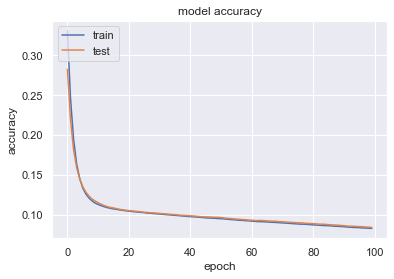

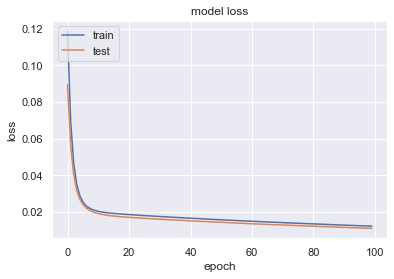

In [24]:
# summarize history for accuracy
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As indicated by the graphs above, the result is not great. While the model is learning since the model less decreased overtime even after the giant drop towards the beggining, the accuracy also fell at a similar pace. So while the algorithm was still learning, it was learning inaccurately. One possible reason for this could be the need for a larger dataset as neural networks tend to evaluate large sets of data more accurately than smaller. Another possibility is that I could have left too many outliers within the data that would have caused the accuracy to drop.